In [2]:
using Plots;

## Day 2 - Morning Session
**Outline**
- atoms and crystal structure
- how electron's behave
- the Schrödinger equation
- the problem...

## atoms and crystal structure

## Periodic Table (Atoms)

So we want to go from individual atoms to crystal structures. How do we start from atoms and stick them together in such a way that holds them together. Obviously, the natural place to start here is the periodic table. This is essentially our "_playground_" if you will to build new materials. We have this set of elements to use as pieces to design and engineer new materials. Some of these are easier to work with than others.

**Anatomy of Periodic Table**

What is the basic anatomy of the periodic table. Each square indicates a new element. The information contained within each cell is: the name of the element, the number of protons which defines the atom, and the atomic mass.

<img src="../../img/periodic_table.png" alt="drawing" width="800" align="left"/>

**brief basics of periodic table**
 - increasing the number of protons (electrons)
 - structure: nucleus (protons and neutrons) and electrons
 - all of life (C, H, N, O, S, P)

The table is organized such that the number of protons increases from left to right. Each row is a period and all of the elements on a specific row have the outermost electrons in the same shell. **Interestingly**, _all of life_ is essentially comprised of just 5 these elements (H, C, O, N, S, P) and they are on the first two rows!

**How are elements made?**

**Question**: Does anyone know how the elements were made? You are stardust. All of of the elements heavier than hydrogen, helium, and lithium are a consequence of exploding stars. A star is continuously burning nuclear in it's core to exist. In the core, it's constantly squeezing protons together to form heavier and heavier elements until it reaches an iron core. Once the star dies in a spectular explosion, it sends these freshly made elements throughout the galaxy.

**What do they look like?**

**What does an look like atom?**

Let's start with the standard cartoon of the atom. We have the nucleus at the core and then the electrons swirling around at various radii. It was a huge feat to figure out that the electrons can only occupy specific energy levels (or electron shells). They can't just exist anywhere. We know this is correct otherwise the atom would not be stable and crash into the nucleus and there would be no life!

The earliest model was reminiscent of celestial bodies with moons going around planets and planets orbiting around suns. This cartoon picture is helpful to keep in mind when thinking about the atomic structure, but we can get a bit more realistic.

In [3]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end;

n=100;
anim = @animate for i ∈ 1:n
    r = 0.05
    p = plot(circle(0,0,1.1), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.9), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.7), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
    plot!(p, circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
    plot!(p, title="Cartoon of hydrogen", showaxis=false);
    annotate!(p, 0, 0.2, "Z=1");
    x = cos(2π*i/n)
    y = sin(2π*i/n)
    plot!(p, circle(-x*0.7,y*0.7,r), seriestype=[:shape], lw=0, c=:blue, fillalpha=0.75)
end;

┌ Info: Saved animation to 
│   fn = /Users/harrisonlabollita/botana_group/outreach/CdeCAz2021/day2/notebooks/hydrogen.gif
└ @ Plots /Users/harrisonlabollita/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/Users/harrisonlabollita/botana_group/outreach/CdeCAz2021/day2/notebooks/hydrogen.gif")
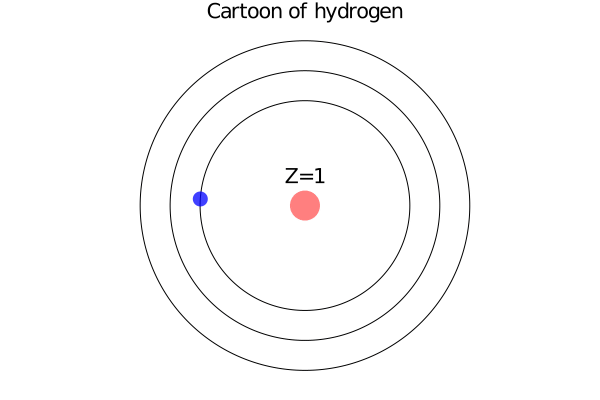

In [4]:
gif(anim, "hydrogen.gif", fps=20)

### but not quite

This picture isn't quite right...

Here is a more realistic picture of the hydrogen atom. Again, we have the proton at the center shown as the red sphere. But not the electron can exist anywhere in within the blue sphere which is more like an electron cloud. It turns out that we can't really think of the electrons as hard spheres, but rather a smeared out distribution of where the electron might live. This is our first quantum mechanical idea. We will revisit this a little later.

In [5]:
using PyPlot

u = range(0,stop=2*π,length=n);
v = range(0,stop=π,length=n);

x = cos.(u) * sin.(v)';
y = sin.(u) * sin.(v)';
z = ones(n) * cos.(v)';
p = plot(x,y,z, rstride=4, cstride=4, alpha=0.25, color = "blue", showaxis=false)
r = 0.2
x = r * cos.(u) * sin.(v)';
y = r * sin.(u) * sin.(v)';
z = r * ones(n) * cos.(v)';
plot!(p, x,y,z, rstride=4, cstride=4, alpha=1, color = "red", showaxis=false)
plot!(p, aspect_ratio=0.75, legend=false, showaxis=false, grid=false, xticks=[], yticks=[],zticks=[]);

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


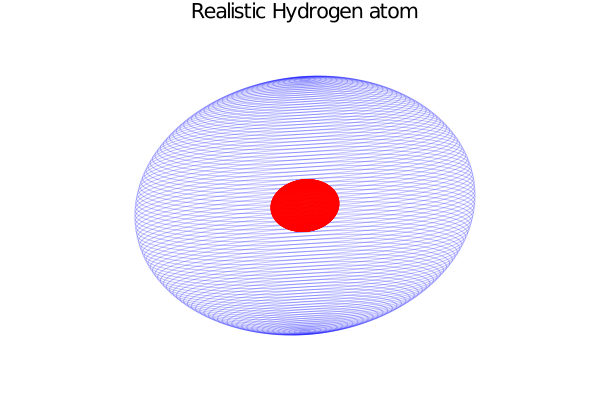

In [6]:
plot!(p, title="Realistic Hydrogen atom")

<img src="../../img/electron_orbitals.jpg" alt="drawing" width="800" align="left"/>

So recall earlier I mentioned that the electrons can occupy specific shells depending on it's energy. As we add electrons to an atom, the electrons keep fillin up these shells until we run out them. Each shell has a certain cloud like shape. We have given these names: s, p, d, f. You might have come across these in chemistry class perhaps. The shells here have different shapes and depending on the relevant electrons in a solid can influence the electronic and magnetic behavior of a solid. We will discuss this in detail later on, but it is helpful to visualize the kind of clouds that the electrons live in.

The electron can be anywhere in the cloud, but what's the scale..?


In [7]:
# If the proton where a tennis ball...
proton = 0.8e-15 # m
electron_cloud = 0.5e-10 # m
scale = electron_cloud/proton
tennis_ball = 6.86e-2 # m
println("The size of the electron cloud at tennis ball scale is $(round(scale*tennis_ball/1000)) km or $(round(scale*tennis_ball/1000*0.621371)) mi.")

The size of the electron cloud at tennis ball scale is 4.0 km or 3.0 mi.


We have kind of established what the atom looks like and we have spoken a little bit about the character of the electrons that surround the atom. But let's crunch some numbers and establish a sense of scale. So if we take the approximate radius of a proton. and the approximate radius of the electron cloud. We can establish some kind of scale. So if we blew up the proton so that it was the size of a tennis ball, then radius of that electron cloud would be 3 miles! That's a cloud that is 6 miles across centered around our measly tennis ball.  Basically, atoms are a whole bunch of empty space!

## how electron's behave

Let's talk a little bit about how electrons behave and then how we can put atoms together to build a solid.

First, let's talk about the masses of the protons and the electrons. It turns out that the mass of the proton is about 2000x the mass of the electron. This will be important latter on when we need to find ways to simplify the ultimate problem that we would like to solve.

In [8]:
# mass
electron_mass = 9e-31 #kg
proton_mass = 1.6e-27 #kg
println("proton mass / electron mass = $(round(proton_mass/electron_mass))")

proton mass / electron mass = 1778.0


### cans and can'ts
- the electrons can exist in only certain shells (quantum)
- can't be labelled: no red and blue or 1 and 2. Electrons are indistinguishable! (quantum)
- charge (**opposites attact** and **likes repel**) (classical)
- spin (quantum)
- no two electrons can exist in the exact same spot! (quantum)
- also, we can't ever really know where the electrons are! (quantum)

Let's go over the cans and cant's of the electrons, which are charged particles. 

- We already saw electrons can only occupy certain discrete energy levels and this is completely quantum mechanical. We know this is true, because this is what makes certain materials transparent. 
- The next rule is that we can't label the electrons. Meaining all electrons are indistinguishable, fundamental particles that can't be told apart.
- We haven't mentioned charge yet. But basically electrons carry around negative charge. Which charge is just like an object's mass or hair color, etc., it is a property of the electron. The protons are positively charged. Electrons and protons carry equal amounts of charge, but opposite in sign. Opposite charges attract each other and like charges repel.
- Another intrinsic property of the electron is it's spin. This is completely quantum mechanical is actually pretty hard to think about in our head. Electrons are called spin-1/2 particles. This quantity gives rise to magnetism in a solid.
- No two electrons can exist in the same spot! Recall, our atomic structure. As we add electrons to an atom, we are filling the electron shells. Each shell can carry two electrons one with spin up and and one with spin down. This is all of that is allowed. We can't have two electrons with the same spin in the same shell. This is physically not allowed.
- Finally, we can never really know where the electron actually is! Like I was saying earlier there happens to be a probablity distribution associated with the electrons and where they will live.

This is basically the concepts from quantum mechanics that we need to know to go any further. There are huge implications that these principles imply. They also make the problem that we are trying to solve so much harder!

## How do we get a solid?

Electrons don't want to be together, but also are the glue that holds everything together!

- Metallic bonding
- Covalent bonding
- Ionic bonding
- and more...

**How do we put the electrons together to get a solid?**

There's a weird juxposition between electrons, because they don't want to be together but at the same time they are the glue that hold atoms together. There are few different ways that atoms can bond together and depending upon how the atoms bond together give us an idea about how a material might behave electronically.

### Metallic Bonding 🍜

All of the atoms share each other's electrons. Electron soup 

All of the nuclei of each atoms share their electrons with neighboring electrons. The electrons are weakly attached to the the nucleus. This forms a sea of negative charge through the solid. 

**How do you think this kind of material behaves electronically?** 

Will it be a good conductor or will it be insulating?

### Covalent Bonding 🤝

Strong overlap between the electron orbitals on neighboring atoms

This is formed when there is a strong ovelap between the electron shells and establishes a balance between the attraction and repulsion between the negative and positive charge. These kinds of materials are usually insulating.

### Ionic bonding ☯️

One atomic species gives up their electrons and another atomic species takes these electrons

Ionic bonding are atoms held together by the fact that one of the atomic species doesn't want it's valence (outermost electron) and the other one does. An example of this is NaCl (table salt). Here Na has 7 electrons, with the outermost electron only weakly attracted to the core. While Cl has 17 electrons and wants to fill it's outermost shell. This behavior is what holds NaCl together.

## the Schrödinger equation

[Erwin Schrödinger](https://en.wikipedia.org/wiki/Erwin_Schrödinger) wrote down the equation

$$ H\psi = E \psi $$

For a generic solid,

$$ \Bigg (-\sum_{i} \frac{ \hbar^{2}}{2m_{e}} \nabla^{2}_{\vec{r}_{i}} - \sum_{I}\frac{Z_{I}e^{2}}{|\vec{R}_{I} - \vec{r}_{i}|} + \frac{e^{2}}{2} \sum_{i\neq j} \frac{1}{|\vec{r}_{i} - \vec{r}_{j}|} + \mathcal{H}^{\text{ion}} \Bigg ) \psi = E \psi$$

Without holding back, this is essentially the equations that we need to solve. We can solve this for the hydrogen atom, but that's about it...

## the problem...

Say we only want to keep track of the spin of N electrons. Their spin can be either up or down. 

We have to keep track of all of the possible configurations

In [9]:
spins = 2                   # up and down
N     = collect(1:5:100)    # number of electons
for num ∈ N
    sleep(1)
    println("num e: $(num)  possible configs $(spins^num)")
    sleep(1)
end

num e: 1  possible configs 2
num e: 6  possible configs 64
num e: 11  possible configs 2048
num e: 16  possible configs 65536
num e: 21  possible configs 2097152
num e: 26  possible configs 67108864
num e: 31  possible configs 2147483648
num e: 36  possible configs 68719476736
num e: 41  possible configs 2199023255552
num e: 46  possible configs 70368744177664
num e: 51  possible configs 2251799813685248
num e: 56  possible configs 72057594037927936
num e: 61  possible configs 2305843009213693952
num e: 66  possible configs 0
num e: 71  possible configs 0
num e: 76  possible configs 0
num e: 81  possible configs 0
num e: 86  possible configs 0
num e: 91  possible configs 0
num e: 96  possible configs 0


We need to keep track of $10^{23}$ electrons!

In [10]:
println("If we had 1e23 dollar bills...")
sleep(2)
println("1 dollar bill is $(6.14*1/12) feet...")
sleep(2)
println("1e23 dollar bills would be $((6.14*1e23*(1/12))/5280) miles...")
sleep(2)
println("The sun is 95 million miles...")
sleep(2)
println("We could go to the sun and back $((6.14*1e23*(1/12))/5280/(2*95e6)) times!")

If we had 1e23 dollar bills...
1 dollar bill is 0.5116666666666666 feet...
1e23 dollar bills would be 9.690656565656564e18 miles...
The sun is 95 million miles...
We could go to the sun and back 5.100345560871876e10 times!


In [ ]:
system(N) = rand(N, N)
memory(N) = @time(system(N))
memory(100000);

## So what are we going to do...

We make approximations...this leads us to density functional theory!